In [1]:
import pickle
import sys
import pandas as pd

In [2]:
len(data)

NameError: name 'data' is not defined

In [ ]:
data[0]['train']

In [6]:
len(data[-1]['train'].departamento.unique())

RecursionError: maximum recursion depth exceeded

In [4]:
len(data[-1]['test'].departamento.unique())

RecursionError: maximum recursion depth exceeded

In [39]:
data[-1]['test'].departamento.unique()

4

In [3]:
train_set = pd.read_csv('../data/train.csv')
test_set =  pd.read_csv('../data/test.csv')

In [4]:
train_set.head()

,Unnamed: 0,fecha,departamento,susceptibles,infectados,recuperados,decesos,cantidad_mayores_65,ipm,poblacion_total,personas_km2,edad_promedio,promedio_morbilidades
0,0,2020-03-02,amazonas,78830.0,0.0,0.0,0.0,2791,81.690909,78830.0,0.719,25.420,2435.250000
1,1,2020-03-02,antioquia,6690977.0,0.0,0.0,0.0,576614,37.586400,6690977.0,105.184,34.628,779755.333333
2,2,2020-03-02,arauca,270708.0,0.0,0.0,0.0,13880,44.457143,270708.0,11.366,29.092,13375.583333
3,3,2020-03-02,atlantico,2546138.0,0.0,0.0,0.0,196909,37.326087,2546138.0,751.517,32.435,306515.916667
4,4,2020-03-02,bogota,8181047.0,0.0,0.0,0.0,632389,9.000000,8181047.0,5155.039,34.469,659978.250000


In [5]:
test_set.head()

,Unnamed: 0,fecha,departamento,susceptibles,infectados,recuperados,decesos,cantidad_mayores_65,ipm,poblacion_total,personas_km2,edad_promedio,promedio_morbilidades
0,5478,2020-08-15,amazonas,73568.0,5.0,5.0,0.0,2791,81.690909,78830.0,0.719,25.420,2435.250000
1,5479,2020-08-15,antioquia,6581876.0,1687.0,442.0,28.0,576614,37.586400,6690977.0,105.184,34.628,779755.333333
2,5480,2020-08-15,arauca,269730.0,4.0,2.0,0.0,13880,44.457143,270708.0,11.366,29.092,13375.583333
3,5481,2020-08-15,atlantico,2428817.0,411.0,184.0,5.0,196909,37.326087,2546138.0,751.517,32.435,306515.916667
4,5482,2020-08-15,bogota,7902662.0,4221.0,638.0,58.0,632389,9.000000,8181047.0,5155.039,34.469,659978.250000


In [6]:
train_departamento = train_set.groupby(["departamento", "fecha"])["infectados"].sum()
train_departamento = train_departamento.reset_index(drop=False)
test_departamento = test_set.groupby(["departamento", "fecha"])["infectados"].sum()
test_departamento = test_departamento.reset_index(drop=False)

In [7]:
test_departamento.head()

,departamento,fecha,infectados
0,amazonas,2020-08-15,5.0
1,amazonas,2020-08-16,7.0
2,amazonas,2020-08-17,1.0
3,amazonas,2020-08-18,7.0
4,amazonas,2020-08-19,4.0


## ANTIOQUIA

In [8]:
train_departamento_filter = train_departamento.loc[train_departamento.departamento == 'antioquia']
test_departamento_filter = test_departamento.loc[test_departamento.departamento == 'antioquia']

In [9]:
len(train_departamento_filter)

166

In [10]:
train_departamento_filter.tail()

,departamento,fecha,infectados
327,antioquia,2020-08-10,2399.0
328,antioquia,2020-08-11,1747.0
329,antioquia,2020-08-12,1656.0
330,antioquia,2020-08-13,1613.0
331,antioquia,2020-08-14,1763.0


In [11]:
len(test_departamento_filter)

7

In [12]:
test_departamento_filter.head()

,departamento,fecha,infectados
7,antioquia,2020-08-15,1687.0
8,antioquia,2020-08-16,1423.0
9,antioquia,2020-08-17,1034.0
10,antioquia,2020-08-18,1415.0
11,antioquia,2020-08-19,1525.0


In [13]:
import matplotlib.pyplot as plt
plt.plot (train_departamento_filter['fecha'], train_departamento_filter['infectados']) 
plt.title ('Infected time serie - Antioquia') 
#plt.grid(True)
plt.ylabel ('number of people infected')
plt.show ()

<Figure size 640x480 with 1 Axes>

In [14]:
import numpy as np
import pmdarima as pm

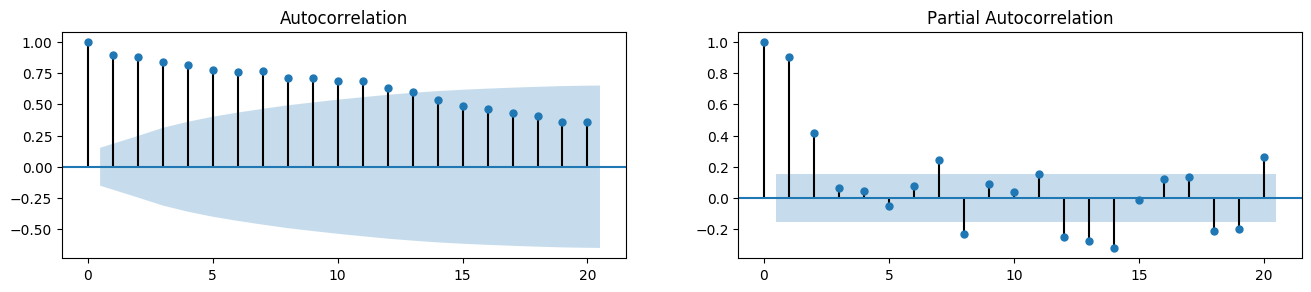

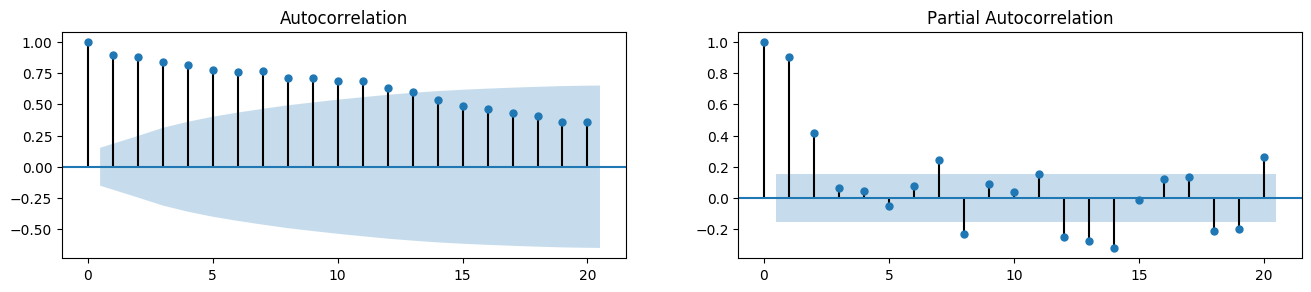

In [15]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# acf_50 = acf(df.value, nlags=20)
# pacf_50 = pacf(df.value, nlags=20)

# Draw Plot
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(train_departamento_filter['infectados'], lags=20, ax=axes[0])
plot_pacf(train_departamento_filter['infectados'], lags=20, ax=axes[1])

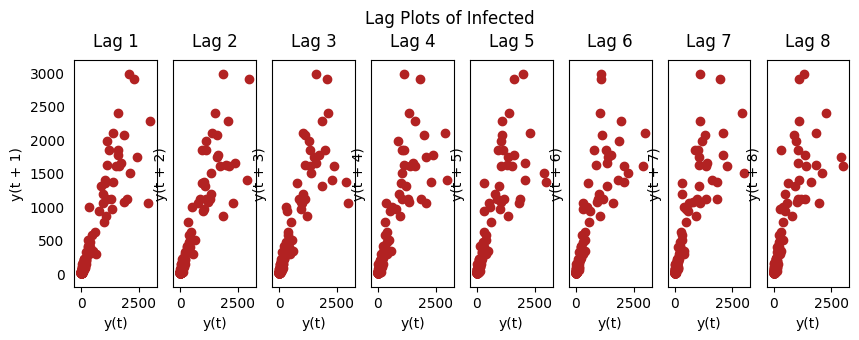

In [16]:
from pandas.plotting import lag_plot
plt.rcParams.update({'ytick.left' : False, 'axes.titlepad':10})

# Plot
fig, axes = plt.subplots(1, 8, figsize=(10,3), sharex=True, sharey=True, dpi=100)
for i, ax in enumerate(axes.flatten()[:8]):
    lag_plot(train_departamento_filter['infectados'], lag=i+1, ax=ax, c='firebrick')
    ax.set_title('Lag ' + str(i+1))

fig.suptitle('Lag Plots of Infected', y=1.05)    
plt.show()

In [17]:
stepwise_fit = pm.auto_arima(train_departamento_filter['infectados'], start_p=0, start_q=0, max_p=7, max_q=8, m=12,
                             start_P=0, seasonal=False, d=1, D=1, trace=True,
                             error_action='ignore',  # don't want to know if an order does not work
                             suppress_warnings=True,  # don't want convergence warnings
                             stepwise=True)  # set to stepwise

stepwise_fit.summary()

/Users/santiagocortes/opt/anaconda3/envs/tf2/lib/python3.7/site-packages/pmdarima/arima/_validation.py:60: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2313.630, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2271.868, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2265.378, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2311.898, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2267.310, Time=0.13 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2267.345, Time=0.09 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2269.026, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=2265.512, Time=0.03 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 0.477 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  166
Model:               SARIMAX(0, 1, 1)   Log Likelihood               -1129.689
Date:                Tue, 25 Aug 2020   AIC                           2265.378
Time:                        08:12:03   BIC                           2274.696
Sample:                             0   HQIC                          2269.160
                                - 166                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     10.7089      8.796      1.217      0.223      -6.531      27.949
ma.L1         -0.6054      0.030    -20.291      0.000      -0.664      -0.547
sigma2      5.167e+04   2106.487     24.530      0.000    4.75e+04    5.58e+04
===================================================================================
Ljung-Box (Q):                       38.93   Jarque-Bera (JB):              1823.11
Prob(Q):                              0.52   Prob(JB):                         0.00
Heteroskedasticity (H):             208.27   Skew:                            -0.07
Prob(H) (two-sided):                  0.00   Kurtosis:                        19.28
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [18]:
from bokeh.plotting import figure, show, output_notebook
import pandas as pd

# init bokeh
output_notebook()

def plot_arima(truth, forecasts, title="ARIMA", xaxis_label='Time',
               yaxis_label='Value', c1='#A6CEE3', c2='#B2DF8A', 
               forecast_start=None, **kwargs):
    
    # make truth and forecasts into pandas series
    n_truth = truth.shape[0]
    n_forecasts = forecasts.shape[0]
    
    # always plot truth the same
    truth = pd.Series(truth, index=np.arange(truth.shape[0]))
    
    # if no defined forecast start, start at the end
    if forecast_start is None:
        idx = np.arange(n_truth, n_truth + n_forecasts)
    else:
        idx = np.arange(forecast_start, n_forecasts)
    forecasts = pd.Series(forecasts, index=idx)
    
    # set up the plot
    p = figure(title=title, plot_height=400, **kwargs)
    p.grid.grid_line_alpha=0.3
    p.xaxis.axis_label = xaxis_label
    p.yaxis.axis_label = yaxis_label
    
    # add the lines
    p.line(truth.index, truth.values, color=c1, legend='Observed')
    p.line(forecasts.index, forecasts.values, color=c2, legend='Forecasted')
    
    return p

Loading BokehJS ...

In [19]:
in_sample_preds = stepwise_fit.predict_in_sample()
in_sample_preds[:10]

array([10.70886079, 11.0217457 , 15.65564571, 19.36575734, 22.07158816,
       23.92113548, 25.13074025, 25.8992239 , 26.77349463, 26.91306957])

In [20]:
show(plot_arima(train_departamento_filter['infectados'], in_sample_preds, 
                title="Original Series & In-sample Predictions", 
                c2='#FF0000', forecast_start=0))

## Predicciones Futuras

In [21]:
next_5 = stepwise_fit.predict(n_periods=7)
show(plot_arima(train_departamento_filter['infectados'], next_5))

In [22]:
## función MAPE

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / ((1/2)*(abs(y_true) + abs(y_pred))))) * 100

In [23]:
mean_absolute_percentage_error(test_departamento_filter['infectados'], next_5)

32.84788875249577

## CUNDINAMARCA

In [24]:
train_departamento_filter = train_departamento.loc[train_departamento.departamento == 'cundinamarca']
test_departamento_filter = test_departamento.loc[test_departamento.departamento == 'cundinamarca']

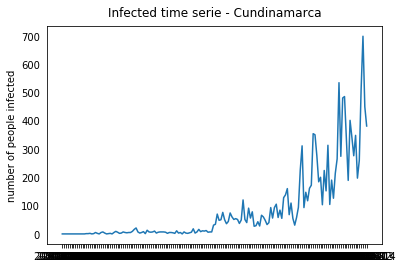

In [25]:
import matplotlib.pyplot as plt
plt.plot (train_departamento_filter['fecha'], train_departamento_filter['infectados']) 
plt.title ('Infected time serie - Cundinamarca') 
#plt.grid(True)
plt.ylabel ('number of people infected')
plt.show ()

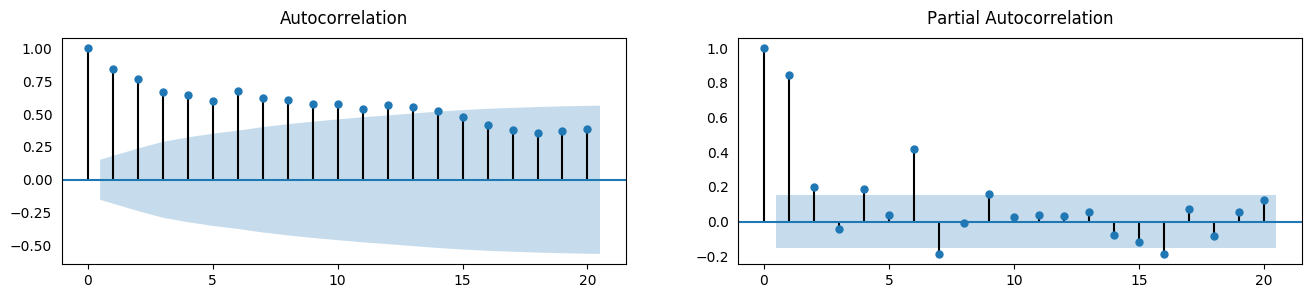

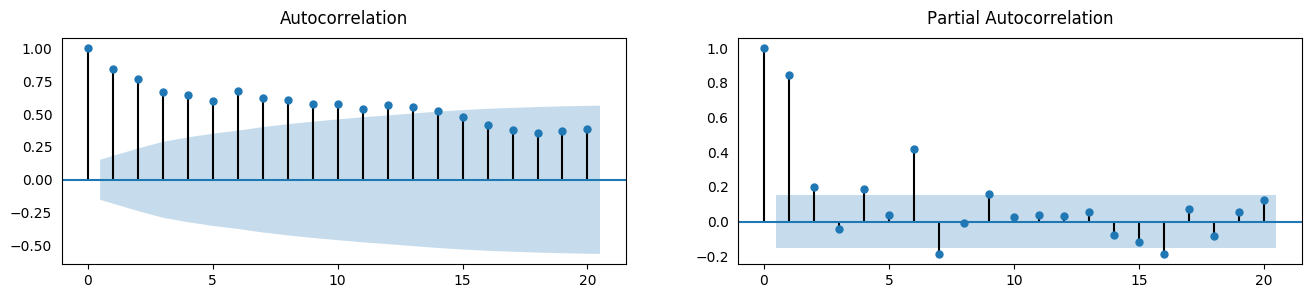

In [26]:
# Draw Plot
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(train_departamento_filter['infectados'], lags=20, ax=axes[0])
plot_pacf(train_departamento_filter['infectados'], lags=20, ax=axes[1])

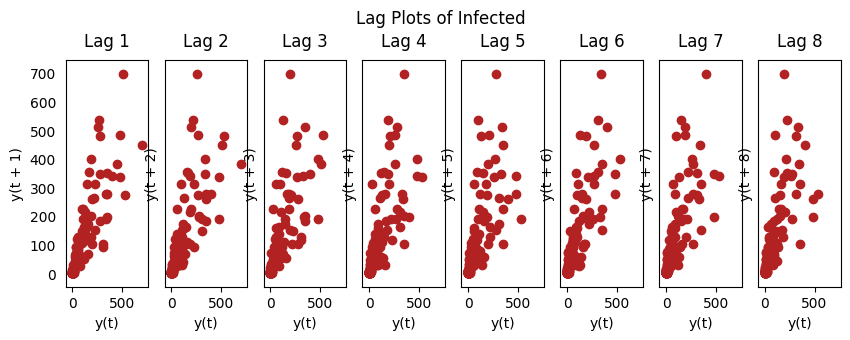

In [27]:
from pandas.plotting import lag_plot
plt.rcParams.update({'ytick.left' : False, 'axes.titlepad':10})

# Plot
fig, axes = plt.subplots(1, 8, figsize=(10,3), sharex=True, sharey=True, dpi=100)
for i, ax in enumerate(axes.flatten()[:8]):
    lag_plot(train_departamento_filter['infectados'], lag=i+1, ax=ax, c='firebrick')
    ax.set_title('Lag ' + str(i+1))

fig.suptitle('Lag Plots of Infected', y=1.05)    
plt.show()

In [28]:
stepwise_fit = pm.auto_arima(train_departamento_filter['infectados'], start_p=0, start_q=0, max_p=7, max_q=8, m=12,
                             start_P=0, seasonal=False, d=1, D=1, trace=True,
                             error_action='ignore',  # don't want to know if an order does not work
                             suppress_warnings=True,  # don't want convergence warnings
                             stepwise=True)  # set to stepwise

stepwise_fit.summary()

/Users/santiagocortes/opt/anaconda3/envs/tf2/lib/python3.7/site-packages/pmdarima/arima/_validation.py:60: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1867.981, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1852.734, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1836.647, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1866.167, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1826.756, Time=0.06 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1828.709, Time=0.15 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1828.732, Time=0.13 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1828.522, Time=0.07 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1850.012, Time=0.05 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1822.206, Time=0.20 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=1818.334, Time=0.24 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=1826.885, Time=0.17 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=1819.663, Time=0.28 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.31 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : 

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  166
Model:               SARIMAX(1, 1, 3)   Log Likelihood                -899.086
Date:                Tue, 25 Aug 2020   AIC                           1810.173
Time:                        08:12:10   BIC                           1828.809
Sample:                             0   HQIC                          1817.738
                                - 166                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      4.7545      2.918      1.629      0.103      -0.965      10.474
ar.L1         -0.9090      0.026    -35.215      0.000      -0.960      -0.858
ma.L1          0.5426      0.053     10.148      0.000       0.438       0.647
ma.L2         -0.6345      0.055    -11.601      0.000      -0.742      -0.527
ma.L3         -0.4905      0.051     -9.691      0.000      -0.590      -0.391
sigma2      3138.1478    228.905     13.709      0.000    2689.503    3586.792
===================================================================================
Ljung-Box (Q):                       56.52   Jarque-Bera (JB):               242.26
Prob(Q):                              0.04   Prob(JB):                         0.00
Heteroskedasticity (H):              88.47   Skew:                             1.30
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [29]:
in_sample_preds = stepwise_fit.predict_in_sample()
in_sample_preds[:10]

array([2.49050631, 2.49389723, 3.21859965, 3.65932618, 5.05631284,
       4.85448627, 6.24635037, 6.13035699, 7.14621097, 7.36776878])

In [30]:
show(plot_arima(train_departamento_filter['infectados'], in_sample_preds, 
                title="Original Series & In-sample Predictions", 
                c2='#FF0000', forecast_start=0))

## Predicciones Futuras

In [31]:
next_5 = stepwise_fit.predict(n_periods=7)
show(plot_arima(train_departamento_filter['infectados'], next_5))

In [32]:
mean_absolute_percentage_error(test_departamento_filter['infectados'], next_5)

46.480116082386715

## ATLÁNTICO

In [33]:
train_departamento_filter = train_departamento.loc[train_departamento.departamento == 'atlantico']
test_departamento_filter = test_departamento.loc[test_departamento.departamento == 'atlantico']

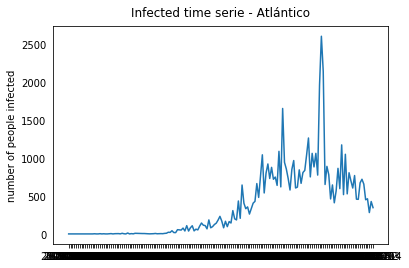

In [34]:
import matplotlib.pyplot as plt
plt.plot (train_departamento_filter['fecha'], train_departamento_filter['infectados']) 
plt.title ('Infected time serie - Atlántico') 
#plt.grid(True)
plt.ylabel ('number of people infected')
plt.show ()

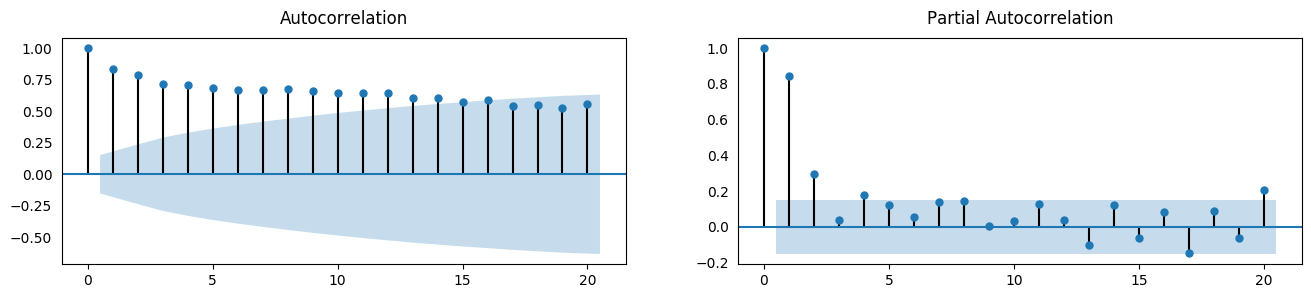

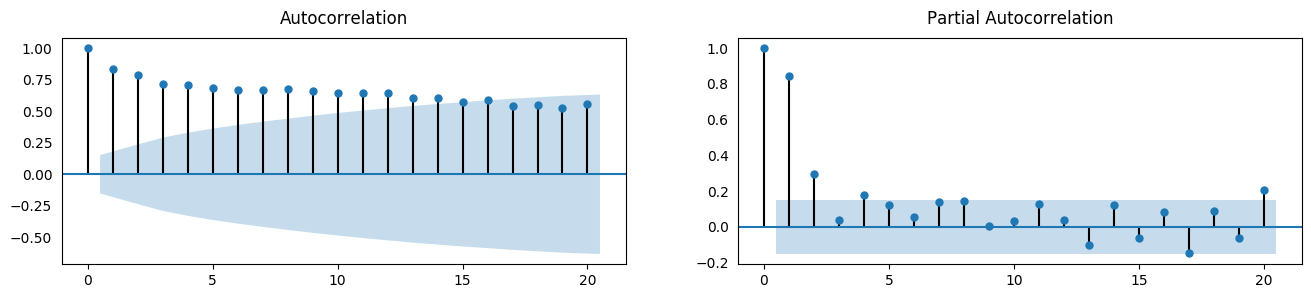

In [35]:
# Draw Plot
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(train_departamento_filter['infectados'], lags=20, ax=axes[0])
plot_pacf(train_departamento_filter['infectados'], lags=20, ax=axes[1])

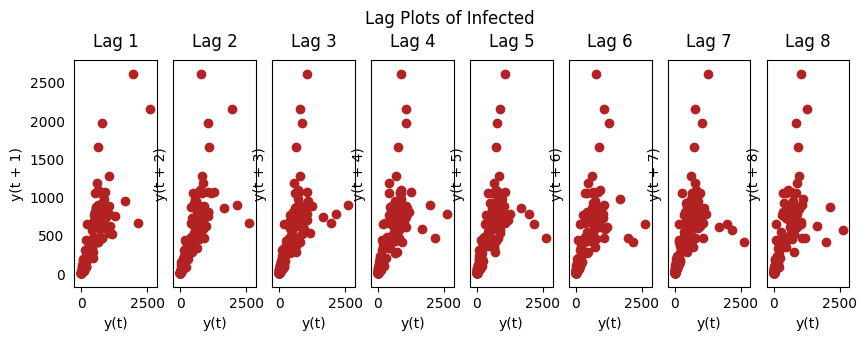

In [36]:
from pandas.plotting import lag_plot
plt.rcParams.update({'ytick.left' : False, 'axes.titlepad':10})

# Plot
fig, axes = plt.subplots(1, 8, figsize=(10,3), sharex=True, sharey=True, dpi=100)
for i, ax in enumerate(axes.flatten()[:8]):
    lag_plot(train_departamento_filter['infectados'], lag=i+1, ax=ax, c='firebrick')
    ax.set_title('Lag ' + str(i+1))

fig.suptitle('Lag Plots of Infected', y=1.05)    
plt.show()

In [37]:
stepwise_fit = pm.auto_arima(train_departamento_filter['infectados'], start_p=0, start_q=0, max_p=7, max_q=8, m=12,
                             start_P=0, seasonal=False, d=1, D=1, trace=True,
                             error_action='ignore',  # don't want to know if an order does not work
                             suppress_warnings=True,  # don't want convergence warnings
                             stepwise=True)  # set to stepwise

stepwise_fit.summary()

/Users/santiagocortes/opt/anaconda3/envs/tf2/lib/python3.7/site-packages/pmdarima/arima/_validation.py:60: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2298.951, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2280.313, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2274.706, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2296.962, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2268.209, Time=0.10 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2268.675, Time=0.16 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2269.307, Time=0.16 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2272.630, Time=0.10 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=2281.347, Time=0.02 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2266.186, Time=0.23 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=2270.011, Time=0.27 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=2269.756, Time=0.29 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=2267.756, Time=0.19 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=2268.022, Time=0.22 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  166
Model:               SARIMAX(2, 1, 2)   Log Likelihood               -1127.093
Date:                Tue, 25 Aug 2020   AIC                           2266.186
Time:                        08:12:16   BIC                           2284.822
Sample:                             0   HQIC                          2273.751
                                - 166                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      3.6138      6.971      0.518      0.604     -10.049      17.277
ar.L1         -0.5406      0.151     -3.570      0.000      -0.837      -0.244
ar.L2          0.4489      0.104      4.312      0.000       0.245       0.653
ma.L1          0.1085      0.133      0.813      0.416      -0.153       0.370
ma.L2         -0.8293      0.075    -11.004      0.000      -0.977      -0.682
sigma2      4.987e+04   2575.138     19.366      0.000    4.48e+04    5.49e+04
===================================================================================
Ljung-Box (Q):                       44.31   Jarque-Bera (JB):               868.20
Prob(Q):                              0.29   Prob(JB):                         0.00
Heteroskedasticity (H):            1023.92   Skew:                             1.06
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.03
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [38]:
in_sample_preds = stepwise_fit.predict_in_sample()
in_sample_preds[:10]

array([3.31037928, 3.37623551, 4.42726978, 5.04798846, 6.08974769,
       6.55736491, 7.54194815, 7.86641602, 8.7664693 , 8.96398594])

In [39]:
show(plot_arima(train_departamento_filter['infectados'], in_sample_preds, 
                title="Original Series & In-sample Predictions", 
                c2='#FF0000', forecast_start=0))

## Predicciones Futuras

In [40]:
next_5 = stepwise_fit.predict(n_periods=7)
show(plot_arima(train_departamento_filter['infectados'], next_5))

In [41]:
mean_absolute_percentage_error(test_departamento_filter['infectados'], next_5)

24.60622598168985

## VALLE DEL CAUCA

In [42]:
train_departamento_filter = train_departamento.loc[train_departamento.departamento == 'valle del cauca']
test_departamento_filter = test_departamento.loc[test_departamento.departamento == 'valle del cauca']

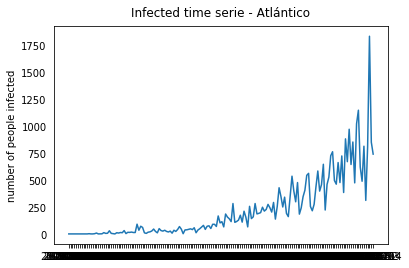

In [43]:
import matplotlib.pyplot as plt
plt.plot (train_departamento_filter['fecha'], train_departamento_filter['infectados']) 
plt.title ('Infected time serie - Atlántico') 
#plt.grid(True)
plt.ylabel ('number of people infected')
plt.show ()

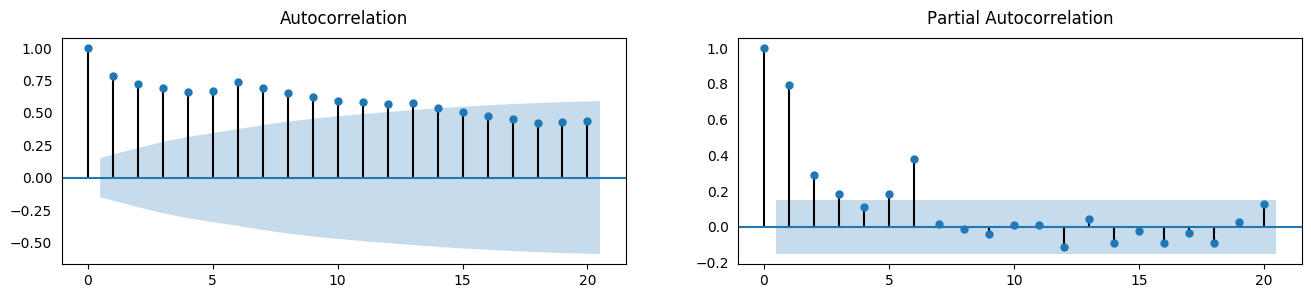

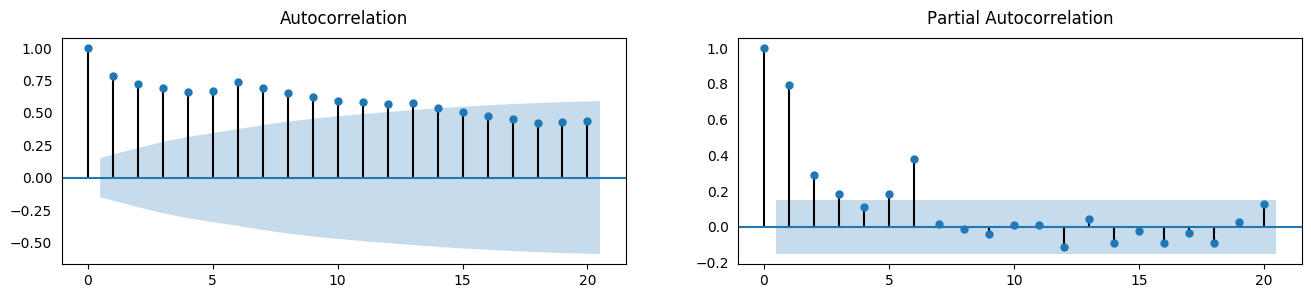

In [44]:
# Draw Plot
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(train_departamento_filter['infectados'], lags=20, ax=axes[0])
plot_pacf(train_departamento_filter['infectados'], lags=20, ax=axes[1])

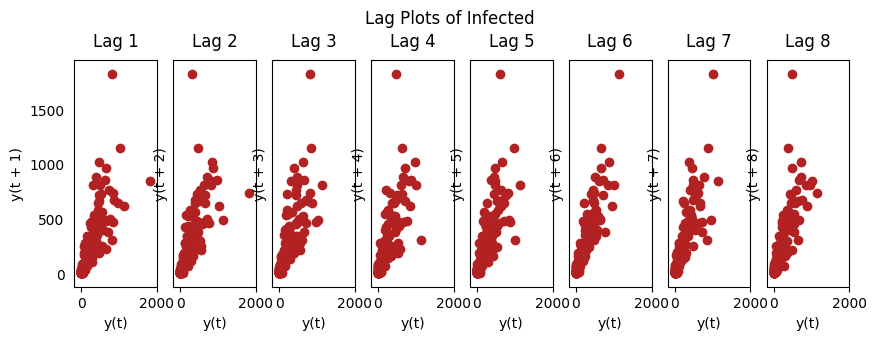

In [45]:
from pandas.plotting import lag_plot
plt.rcParams.update({'ytick.left' : False, 'axes.titlepad':10})

# Plot
fig, axes = plt.subplots(1, 8, figsize=(10,3), sharex=True, sharey=True, dpi=100)
for i, ax in enumerate(axes.flatten()[:8]):
    lag_plot(train_departamento_filter['infectados'], lag=i+1, ax=ax, c='firebrick')
    ax.set_title('Lag ' + str(i+1))

fig.suptitle('Lag Plots of Infected', y=1.05)    
plt.show()

In [46]:
stepwise_fit = pm.auto_arima(train_departamento_filter['infectados'], start_p=0, start_q=0, max_p=7, max_q=8, m=12,
                             start_P=0, seasonal=False, d=1, D=1, trace=True,
                             error_action='ignore',  # don't want to know if an order does not work
                             suppress_warnings=True,  # don't want convergence warnings
                             stepwise=True)  # set to stepwise

stepwise_fit.summary()

/Users/santiagocortes/opt/anaconda3/envs/tf2/lib/python3.7/site-packages/pmdarima/arima/_validation.py:60: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2185.221, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2160.113, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2099.208, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2183.324, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2101.186, Time=0.08 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2101.168, Time=0.11 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=2105.713, Time=0.03 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 0.469 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  166
Model:               SARIMAX(0, 1, 1)   Log Likelihood               -1046.604
Date:                Mon, 24 Aug 2020   AIC                           2099.208
Time:                        20:29:06   BIC                           2108.526
Sample:                             0   HQIC                          2102.990
                                - 166                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      5.4234      2.780      1.951      0.051      -0.024      10.871
ma.L1         -0.8562      0.051    -16.858      0.000      -0.956      -0.757
sigma2      1.878e+04    920.780     20.392      0.000     1.7e+04    2.06e+04
===================================================================================
Ljung-Box (Q):                       81.58   Jarque-Bera (JB):              4822.05
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):              47.46   Skew:                             3.43
Prob(H) (two-sided):                  0.00   Kurtosis:                        28.58
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [47]:
in_sample_preds = stepwise_fit.predict_in_sample()
show(plot_arima(train_departamento_filter['infectados'], in_sample_preds, 
                title="Original Series & In-sample Predictions", 
                c2='#FF0000', forecast_start=0))

## Predicciones Futuras

In [48]:
next_5 = stepwise_fit.predict(n_periods=7)
show(plot_arima(train_departamento_filter['infectados'], next_5))

In [49]:
mean_absolute_percentage_error(test_departamento_filter['infectados'], next_5)

15.916292225577571

## TODOS LOS DEPARTAMENTOS

In [50]:
test_departamento['departamento']

0      amazonas
1      amazonas
2      amazonas
3      amazonas
4      amazonas
         ...   
226     vichada
227     vichada
228     vichada
229     vichada
230     vichada
Name: departamento, Length: 231, dtype: object

In [51]:
real = test_departamento[test_departamento['departamento'] == 'antioquia' ] ['infectados']

In [52]:
real

7     1687.0
8     1423.0
9     1034.0
10    1415.0
11    1525.0
12     826.0
13    1279.0
Name: infectados, dtype: float64

In [56]:
mape =  {}
for departamento in train_set.departamento.unique():
    #print(departamento)
    stepwise_fit = pm.auto_arima(train_departamento[train_departamento['departamento'] == departamento]['infectados'], 
                                 start_p=0, start_q=0, max_p=7, max_q=8, m=12, start_P=0, seasonal=False, d=1, D=1, 
                                 trace=True, error_action='ignore',  # don't want to know if an order does not work
                                 suppress_warnings=True,  # don't want convergence warnings
                                 stepwise=False)  # set to stepwise
    next_7 = stepwise_fit.predict(n_periods=7)
    real = test_departamento[test_departamento['departamento'] == departamento ] ['infectados']
    mape[departamento] = mean_absolute_percentage_error(real, next_7)
print(mape)

/Users/santiagocortes/opt/anaconda3/envs/tf2/lib/python3.7/site-packages/pmdarima/arima/_validation.py:60: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1691.771, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1588.324, Time=0.04 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1585.999, Time=0.05 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=1585.711, Time=0.07 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=1587.683, Time=0.11 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=1588.005, Time=0.15 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1643.208, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1587.261, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1584.821, Time=0.08 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=1587.423, Time=0.16 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=1589.099, Time=0.22 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1606.204, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1585.153, Time=0.07 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1587.054, Time=0.13 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=1577.970, Time=0.30 sec
 ARIMA(3,1

/Users/santiagocortes/opt/anaconda3/envs/tf2/lib/python3.7/site-packages/pmdarima/arima/_validation.py:60: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2267.345, Time=0.09 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=2264.919, Time=0.15 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=2266.431, Time=0.18 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=2268.327, Time=0.26 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2271.868, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2267.310, Time=0.11 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2269.026, Time=0.13 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=2266.581, Time=0.14 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=2267.190, Time=0.19 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=2271.358, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2265.431, Time=0.13 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2267.104, Time=0.20 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=2265.352, Time=0.31 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=2271.470, Time=0.03 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=2266.864, Time=0.22 sec
 ARIMA(3,1

/Users/santiagocortes/opt/anaconda3/envs/tf2/lib/python3.7/site-packages/pmdarima/arima/_validation.py:60: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1321.571, Time=0.04 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=1323.366, Time=0.07 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=1320.328, Time=0.14 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=1322.056, Time=0.17 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1379.374, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1321.738, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1323.493, Time=0.07 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=1325.564, Time=0.08 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=1322.260, Time=0.14 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1344.206, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1323.135, Time=0.07 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1324.890, Time=0.10 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=1311.048, Time=0.24 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=1330.615, Time=0.05 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=1323.453, Time=0.09 sec
 ARIMA(3,1

/Users/santiagocortes/opt/anaconda3/envs/tf2/lib/python3.7/site-packages/pmdarima/arima/_validation.py:60: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2272.630, Time=0.10 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=2265.789, Time=0.12 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=2267.757, Time=0.18 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=2269.749, Time=0.23 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2280.313, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2268.209, Time=0.10 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2269.307, Time=0.16 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=2267.756, Time=0.18 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=2266.951, Time=0.28 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=2281.347, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2268.675, Time=0.14 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2266.186, Time=0.22 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=2269.756, Time=0.28 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=2276.556, Time=0.03 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=2268.022, Time=0.17 sec
 ARIMA(3,1

/Users/santiagocortes/opt/anaconda3/envs/tf2/lib/python3.7/site-packages/pmdarima/arima/_validation.py:60: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2596.230, Time=0.10 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=2466.816, Time=0.19 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=2468.220, Time=0.21 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=2469.862, Time=0.28 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2519.012, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2473.395, Time=0.11 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2474.840, Time=0.20 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=2477.193, Time=0.21 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=2469.366, Time=0.28 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=2492.925, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2468.829, Time=0.13 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2476.442, Time=0.22 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=2464.705, Time=0.30 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=2477.864, Time=0.03 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=2468.655, Time=0.16 sec
 ARIMA(3,1

/Users/santiagocortes/opt/anaconda3/envs/tf2/lib/python3.7/site-packages/pmdarima/arima/_validation.py:60: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=1894.559, Time=0.12 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=1896.026, Time=0.16 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=1897.920, Time=0.21 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1918.113, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1907.479, Time=0.09 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1909.126, Time=0.15 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=1896.115, Time=0.13 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=1895.958, Time=0.24 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1919.981, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1901.271, Time=0.14 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1899.008, Time=0.13 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=1897.938, Time=0.18 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=1915.375, Time=0.06 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=1897.216, Time=0.16 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=1899.946, Time=0.23 sec
 ARIMA(4,1

/Users/santiagocortes/opt/anaconda3/envs/tf2/lib/python3.7/site-packages/pmdarima/arima/_validation.py:60: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=1217.347, Time=0.06 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=1217.366, Time=0.08 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=1216.765, Time=0.11 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1254.788, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1222.592, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1220.294, Time=0.07 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=1214.857, Time=0.16 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=1216.844, Time=0.26 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1222.459, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1218.536, Time=0.06 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1215.384, Time=0.11 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=1207.435, Time=0.28 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=1221.525, Time=0.06 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=1220.362, Time=0.09 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=1217.327, Time=0.16 sec
 ARIMA(4,1

/Users/santiagocortes/opt/anaconda3/envs/tf2/lib/python3.7/site-packages/pmdarima/arima/_validation.py:60: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1296.335, Time=0.11 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=1293.673, Time=0.07 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=1292.103, Time=0.10 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=1292.646, Time=0.15 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1343.490, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1299.050, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1292.010, Time=0.13 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=1292.448, Time=0.16 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=1292.028, Time=0.25 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1320.842, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1292.795, Time=0.05 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1284.756, Time=0.15 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=1293.916, Time=0.26 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=1309.642, Time=0.05 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=1293.950, Time=0.08 sec
 ARIMA(3,1

/Users/santiagocortes/opt/anaconda3/envs/tf2/lib/python3.7/site-packages/pmdarima/arima/_validation.py:60: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=1555.770, Time=0.10 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=1532.596, Time=0.20 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=1533.945, Time=0.30 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1576.763, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1576.937, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1573.417, Time=0.09 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=1540.508, Time=0.14 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=1533.694, Time=0.26 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1577.507, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1571.629, Time=0.09 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1566.089, Time=0.13 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=1538.928, Time=0.24 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=1572.729, Time=0.06 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=1549.947, Time=0.11 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=1515.276, Time=0.26 sec
 ARIMA(4,1

/Users/santiagocortes/opt/anaconda3/envs/tf2/lib/python3.7/site-packages/pmdarima/arima/_validation.py:60: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=959.596, Time=0.05 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=960.983, Time=0.07 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=957.253, Time=0.09 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=943.633, Time=0.14 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1000.771, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=959.785, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=938.837, Time=0.22 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=960.380, Time=0.10 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=962.014, Time=0.10 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=978.326, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=961.537, Time=0.06 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=959.717, Time=0.12 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=955.618, Time=0.20 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=977.837, Time=0.05 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=963.536, Time=0.06 sec
 ARIMA(3,1,2)(0,0,0)[0] 

/Users/santiagocortes/opt/anaconda3/envs/tf2/lib/python3.7/site-packages/pmdarima/arima/_validation.py:60: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=1432.394, Time=0.14 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=1422.903, Time=0.19 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1458.342, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1440.326, Time=0.07 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1434.448, Time=0.09 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=1434.388, Time=0.15 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=1429.095, Time=0.22 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1458.595, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1441.155, Time=0.09 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1434.657, Time=0.13 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=1424.569, Time=0.25 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=1455.669, Time=0.06 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=1436.185, Time=0.10 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=1435.999, Time=0.17 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=1451.726, Time=0.07 sec
 ARIMA(4,1

/Users/santiagocortes/opt/anaconda3/envs/tf2/lib/python3.7/site-packages/pmdarima/arima/_validation.py:60: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=1593.827, Time=0.11 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=1595.821, Time=0.16 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=1596.288, Time=0.23 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1645.727, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1595.380, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1603.088, Time=0.11 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=1596.665, Time=0.20 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=1596.938, Time=0.25 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1618.537, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1594.980, Time=0.10 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1597.433, Time=0.18 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=1592.385, Time=0.32 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=1606.081, Time=0.06 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=1596.610, Time=0.11 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=1597.907, Time=0.23 sec
 ARIMA(4,1

/Users/santiagocortes/opt/anaconda3/envs/tf2/lib/python3.7/site-packages/pmdarima/arima/_validation.py:60: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=1517.160, Time=0.07 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=1518.720, Time=0.12 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=1510.795, Time=0.19 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1567.225, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1516.770, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1514.314, Time=0.44 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=1517.748, Time=0.17 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=1516.113, Time=0.17 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1549.780, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1518.174, Time=0.07 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1517.544, Time=0.13 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=1501.305, Time=0.27 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=1549.888, Time=0.05 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=1519.794, Time=0.10 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=1521.580, Time=0.17 sec
 ARIMA(4,1

/Users/santiagocortes/opt/anaconda3/envs/tf2/lib/python3.7/site-packages/pmdarima/arima/_validation.py:60: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=1900.185, Time=0.16 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=1888.194, Time=0.26 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=1887.102, Time=0.29 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1930.150, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1905.237, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1900.760, Time=0.14 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=1878.881, Time=0.22 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=1876.098, Time=0.28 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1919.730, Time=0.05 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1898.196, Time=0.09 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1872.413, Time=0.22 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=1880.326, Time=0.27 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=1918.356, Time=0.06 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=1898.760, Time=0.12 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=1890.650, Time=0.24 sec
 ARIMA(4,1

/Users/santiagocortes/opt/anaconda3/envs/tf2/lib/python3.7/site-packages/pmdarima/arima/_validation.py:60: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1828.522, Time=0.07 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=1827.339, Time=0.13 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=1826.029, Time=0.17 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=1821.140, Time=0.22 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1852.734, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1826.756, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1828.732, Time=0.12 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=1810.173, Time=0.15 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=1810.986, Time=0.22 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1850.012, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1828.709, Time=0.14 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1822.206, Time=0.20 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=1810.695, Time=0.22 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=1838.132, Time=0.06 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=1826.885, Time=0.17 sec
 ARIMA(3,1

/Users/santiagocortes/opt/anaconda3/envs/tf2/lib/python3.7/site-packages/pmdarima/arima/_validation.py:60: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=369.263, Time=0.09 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=371.246, Time=0.15 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=373.229, Time=0.20 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=375.263, Time=0.14 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=377.186, Time=0.34 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=433.923, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=371.247, Time=0.11 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=373.090, Time=0.18 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=375.086, Time=0.20 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=377.057, Time=0.30 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=416.723, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=373.230, Time=0.15 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=375.087, Time=0.23 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=372.703, Time=0.31 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=408.266, Time=0.03 sec
 ARIMA(3,1,1)(0,0,0)[0] i

/Users/santiagocortes/opt/anaconda3/envs/tf2/lib/python3.7/site-packages/pmdarima/arima/_validation.py:60: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=866.660, Time=0.11 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=868.576, Time=0.09 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=870.007, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=916.046, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=865.030, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=864.862, Time=0.09 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=866.766, Time=0.13 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=868.735, Time=0.13 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=895.037, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=866.715, Time=0.06 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=866.762, Time=0.12 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=868.615, Time=0.25 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=890.037, Time=0.03 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=868.571, Time=0.10 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=868.727, Time=0.16 sec
 ARIMA(4,1,0)(0,0,0)[0] i

/Users/santiagocortes/opt/anaconda3/envs/tf2/lib/python3.7/site-packages/pmdarima/arima/_validation.py:60: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=1369.811, Time=0.13 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=1361.204, Time=0.18 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1404.245, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1379.478, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1377.597, Time=0.10 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=1379.597, Time=0.14 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=1369.135, Time=0.14 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1392.885, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1379.773, Time=0.09 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1379.597, Time=0.16 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=1372.272, Time=0.14 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=1367.003, Time=0.05 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=1368.378, Time=0.10 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=1370.376, Time=0.13 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=1368.441, Time=0.09 sec
 ARIMA(4,1

/Users/santiagocortes/opt/anaconda3/envs/tf2/lib/python3.7/site-packages/pmdarima/arima/_validation.py:60: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=1415.317, Time=0.07 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=1414.504, Time=0.11 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=1410.330, Time=0.16 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1436.029, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1412.540, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1414.032, Time=0.10 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=1415.989, Time=0.16 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=1415.399, Time=0.17 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1428.481, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1414.046, Time=0.09 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1415.404, Time=0.21 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=1418.032, Time=0.16 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=1429.204, Time=0.06 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=1415.882, Time=0.11 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=1417.485, Time=0.16 sec
 ARIMA(4,1

/Users/santiagocortes/opt/anaconda3/envs/tf2/lib/python3.7/site-packages/pmdarima/arima/_validation.py:60: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=1734.835, Time=0.14 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=1736.557, Time=0.17 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=1734.975, Time=0.31 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1748.143, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1749.973, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1741.437, Time=0.08 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=1731.578, Time=0.14 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=1733.477, Time=0.28 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1750.076, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1735.103, Time=0.12 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1731.471, Time=0.14 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=1733.062, Time=0.28 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=1746.034, Time=0.06 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=1730.091, Time=0.16 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=1724.623, Time=0.30 sec
 ARIMA(4,1

/Users/santiagocortes/opt/anaconda3/envs/tf2/lib/python3.7/site-packages/pmdarima/arima/_validation.py:60: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1573.902, Time=0.07 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=1575.732, Time=0.10 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=1576.706, Time=0.12 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=1578.517, Time=0.15 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1596.073, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1573.920, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1575.059, Time=0.08 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=1576.322, Time=0.29 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=1579.262, Time=0.30 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1586.254, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1575.838, Time=0.08 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1576.318, Time=0.11 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=1576.304, Time=0.33 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=1580.243, Time=0.07 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=1577.064, Time=0.12 sec
 ARIMA(3,1

/Users/santiagocortes/opt/anaconda3/envs/tf2/lib/python3.7/site-packages/pmdarima/arima/_validation.py:60: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1709.777, Time=0.07 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=1708.783, Time=0.13 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=1709.764, Time=0.14 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=1703.592, Time=0.23 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1759.571, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1709.785, Time=0.08 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1708.126, Time=0.09 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=1708.845, Time=0.16 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=1710.071, Time=0.22 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1725.664, Time=0.05 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1706.555, Time=0.11 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1708.525, Time=0.13 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=1693.680, Time=0.28 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=1705.236, Time=0.07 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=1707.228, Time=0.12 sec
 ARIMA(3,1

/Users/santiagocortes/opt/anaconda3/envs/tf2/lib/python3.7/site-packages/pmdarima/arima/_validation.py:60: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1693.711, Time=0.08 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=1690.451, Time=0.13 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=1680.644, Time=0.16 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=1682.542, Time=0.18 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1725.632, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1693.900, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1687.914, Time=0.18 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=1697.568, Time=0.18 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=1682.610, Time=0.18 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1714.135, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1691.145, Time=0.10 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1683.663, Time=0.19 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=1671.810, Time=0.26 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=1677.662, Time=0.06 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=1675.492, Time=0.12 sec
 ARIMA(3,1

/Users/santiagocortes/opt/anaconda3/envs/tf2/lib/python3.7/site-packages/pmdarima/arima/_validation.py:60: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1409.756, Time=0.06 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=1389.623, Time=0.08 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=1382.842, Time=0.11 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=1384.599, Time=0.15 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1464.850, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1410.115, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1397.804, Time=0.10 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=1384.478, Time=0.14 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=1384.496, Time=0.18 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1419.125, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1388.085, Time=0.06 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1389.404, Time=0.10 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=1373.278, Time=0.27 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=1391.673, Time=0.06 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=1388.985, Time=0.11 sec
 ARIMA(3,1

/Users/santiagocortes/opt/anaconda3/envs/tf2/lib/python3.7/site-packages/pmdarima/arima/_validation.py:60: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=1044.826, Time=0.06 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=1046.802, Time=0.09 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=1047.608, Time=0.14 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1074.191, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1043.839, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1044.850, Time=0.09 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=1044.705, Time=0.09 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=1046.684, Time=0.11 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1056.498, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1045.020, Time=0.05 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1044.394, Time=0.07 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=1044.544, Time=0.17 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=1055.495, Time=0.03 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=1046.986, Time=0.08 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=1046.302, Time=0.08 sec
 ARIMA(4,1

/Users/santiagocortes/opt/anaconda3/envs/tf2/lib/python3.7/site-packages/pmdarima/arima/_validation.py:60: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=1411.057, Time=0.08 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=1409.638, Time=0.12 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=1402.151, Time=0.15 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1435.946, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1410.547, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1410.335, Time=0.08 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=1410.053, Time=0.13 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=1411.748, Time=0.12 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1426.060, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1409.849, Time=0.08 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1410.146, Time=0.10 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=1411.978, Time=0.16 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=1416.961, Time=0.06 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=1410.140, Time=0.11 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=1394.150, Time=0.26 sec
 ARIMA(4,1

/Users/santiagocortes/opt/anaconda3/envs/tf2/lib/python3.7/site-packages/pmdarima/arima/_validation.py:60: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=500.243, Time=0.18 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=501.098, Time=0.16 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=503.087, Time=0.23 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=549.898, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=498.455, Time=0.10 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=500.361, Time=0.13 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=502.401, Time=0.14 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=503.091, Time=0.22 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=536.164, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=500.110, Time=0.08 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=501.374, Time=0.22 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=498.735, Time=0.31 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=521.119, Time=0.04 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=501.033, Time=0.11 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=503.017, Time=0.14 sec
 ARIMA(4,1,0)(0,0,0)[0] i

/Users/santiagocortes/opt/anaconda3/envs/tf2/lib/python3.7/site-packages/pmdarima/arima/_validation.py:60: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1791.586, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1725.476, Time=0.04 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1716.613, Time=0.08 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=1718.136, Time=0.12 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=1719.655, Time=0.19 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=1687.660, Time=0.28 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1737.195, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1719.754, Time=0.07 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1710.497, Time=0.09 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=1713.660, Time=0.22 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=1713.923, Time=0.26 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1710.224, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1708.475, Time=0.12 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1708.404, Time=0.16 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=1709.663, Time=0.27 sec
 ARIMA(3,1

/Users/santiagocortes/opt/anaconda3/envs/tf2/lib/python3.7/site-packages/pmdarima/arima/_validation.py:60: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1726.956, Time=0.05 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1724.019, Time=0.05 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=1719.860, Time=0.11 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=1721.261, Time=0.11 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=1713.866, Time=0.18 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1733.090, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1717.245, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1718.052, Time=0.12 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=1719.590, Time=0.18 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=1717.755, Time=0.27 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1731.820, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1717.766, Time=0.07 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1713.017, Time=0.17 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=1714.954, Time=0.22 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=1730.921, Time=0.06 sec
 ARIMA(3,1

/Users/santiagocortes/opt/anaconda3/envs/tf2/lib/python3.7/site-packages/pmdarima/arima/_validation.py:60: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=1533.481, Time=0.10 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=1535.322, Time=0.15 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=1534.415, Time=0.18 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1579.490, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1532.974, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1535.285, Time=0.07 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=1534.496, Time=0.26 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=1537.306, Time=0.21 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1556.166, Time=0.05 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1533.981, Time=0.09 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1535.787, Time=0.18 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=1524.028, Time=0.32 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=1553.323, Time=0.07 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=1535.970, Time=0.11 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=1537.964, Time=0.21 sec
 ARIMA(4,1

/Users/santiagocortes/opt/anaconda3/envs/tf2/lib/python3.7/site-packages/pmdarima/arima/_validation.py:60: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=2082.851, Time=0.16 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=2088.392, Time=0.27 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=2088.086, Time=0.32 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2160.113, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2101.186, Time=0.08 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2102.921, Time=0.13 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=2105.160, Time=0.17 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=2076.267, Time=0.32 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=2126.590, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2095.379, Time=0.13 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2070.056, Time=0.24 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=2171.338, Time=0.16 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=2122.700, Time=0.08 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=2096.455, Time=0.15 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=2099.370, Time=0.22 sec
 ARIMA(4,1

/Users/santiagocortes/opt/anaconda3/envs/tf2/lib/python3.7/site-packages/pmdarima/arima/_validation.py:60: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1154.800, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1059.020, Time=0.09 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1060.074, Time=0.13 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=1061.909, Time=0.08 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=1063.608, Time=0.21 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=1065.461, Time=0.29 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1121.533, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1060.149, Time=0.10 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1060.238, Time=0.24 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=1061.872, Time=0.23 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=1065.292, Time=0.29 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1106.782, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1061.817, Time=0.16 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1061.885, Time=0.23 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=1062.767, Time=0.29 sec
 ARIMA(3,1

/Users/santiagocortes/opt/anaconda3/envs/tf2/lib/python3.7/site-packages/pmdarima/arima/_validation.py:60: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=38.996, Time=0.10 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=40.652, Time=0.15 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=42.251, Time=0.15 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=43.905, Time=0.24 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=45.965, Time=0.32 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=108.966, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=40.684, Time=0.14 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=42.952, Time=0.14 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=43.981, Time=0.25 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=46.408, Time=0.27 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=90.570, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=42.318, Time=0.17 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=44.016, Time=0.19 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=44.015, Time=0.29 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=81.884, Time=0.05 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : A

In [57]:
sum(mape.values())/len(mape.values())

57.69676192790466

In [58]:
sum(mape.values[[1,3,4,-3]])/4

TypeError: 'builtin_function_or_method' object is not subscriptable

In [59]:
a = [mape['bogota'], mape['antioquia'], mape['atlantico'], mape['valle del cauca']]

In [60]:
sum(a)/4

35.57980545033239

In [54]:
[ mape[departamento] for departamento in mape.keys()]

[91.66122174630716,
 32.84788875249577,
 107.11336404969747,
 49.2124519633797,
 21.580289407151216,
 43.44675763521328,
 25.523705145786618,
 48.67463646932938,
 26.668107252896167,
 40.243816681342416,
 50.91959353643901,
 35.7595067109771,
 30.444276475979056,
 26.06994797347558,
 46.480116082386715,
 200.0,
 118.07594269329924,
 41.61476476360101,
 46.21544895038095,
 40.33779981387885,
 39.55354479621452,
 36.471987794974964,
 30.18368029474228,
 43.85961334533622,
 44.235141802094105,
 37.01217660093102,
 94.83562926162735,
 24.3962017291615,
 58.04865203625062,
 36.26244344571505,
 31.832584451155142,
 74.38880932063647,
 190.5430670945459]

In [55]:
mape

{'amazonas': 91.66122174630716,
 'antioquia': 32.84788875249577,
 'arauca': 107.11336404969747,
 'atlantico': 49.2124519633797,
 'bogota': 21.580289407151216,
 'bolivar': 43.44675763521328,
 'boyaca': 25.523705145786618,
 'caldas': 48.67463646932938,
 'caqueta': 26.668107252896167,
 'casanare': 40.243816681342416,
 'cauca': 50.91959353643901,
 'cesar': 35.7595067109771,
 'choco': 30.444276475979056,
 'cordoba': 26.06994797347558,
 'cundinamarca': 46.480116082386715,
 'guainia': 200.0,
 'guaviare': 118.07594269329924,
 'huila': 41.61476476360101,
 'la guajira': 46.21544895038095,
 'magdalena': 40.33779981387885,
 'meta': 39.55354479621452,
 'narino': 36.471987794974964,
 'norte de santander': 30.18368029474228,
 'putumayo': 43.85961334533622,
 'quindio': 44.235141802094105,
 'risaralda': 37.01217660093102,
 'san andres y providencia': 94.83562926162735,
 'santander': 24.3962017291615,
 'sucre': 58.04865203625062,
 'tolima': 36.26244344571505,
 'valle del cauca': 31.832584451155142,
 'va